In [1]:
import os
os.chdir("../")
print(os.getcwd())

In [2]:
%load_ext autoreload
%autoreload 2
import covsirphy as cs

In [3]:
# Create example data with SIR-F model
model = cs.SIRF
area = {"country": "Full", "province": model.NAME}
example_data = cs.ExampleData(tau=1440, start_date="01Jan2020")
example_data.add(model, **area)

In [4]:
# Population value
population_data = cs.PopulationData()
population_data.update(model.EXAMPLE["population"], **area)

LOCAL LIBRARY


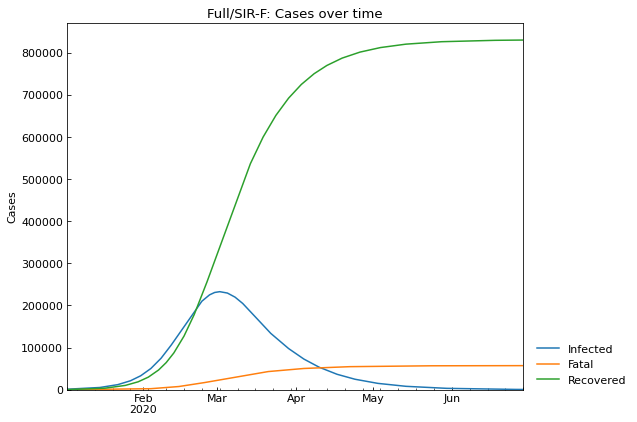

In [5]:
# See records with Scenario class
snl = cs.Scenario(example_data, population_data,tau=1440, **area)
_ = snl.records()

In [7]:
# Set phase
snl.add().summary()

# Parameter estimation
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (02Jan2020 - 29Jun2020): finished 2495 trials in 3 min  1 sec
Completed optimization. Total: 3 min  2 sec


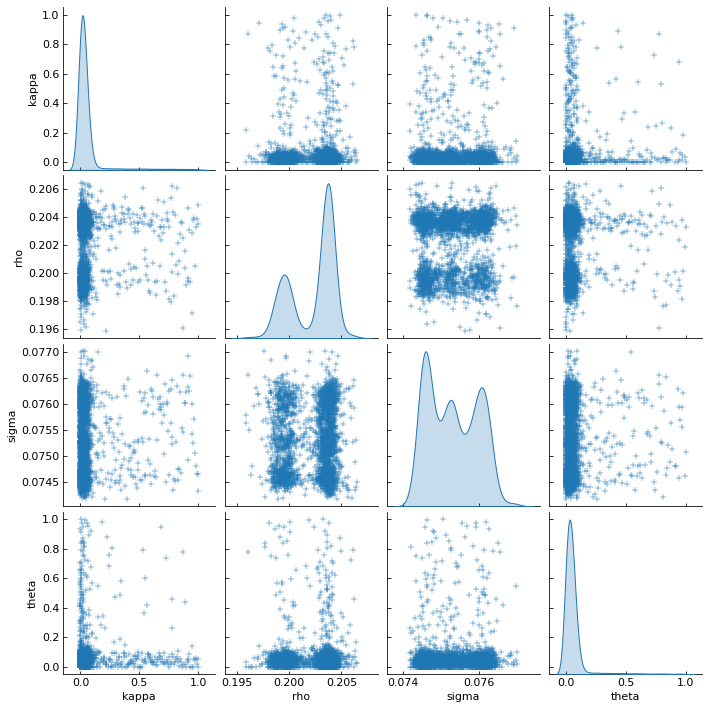

In [23]:
history = snl.estimate_history("0th")

In [67]:
history["rolling"] = history["value"].rolling(12).mean()

In [78]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=history["number"], y=history["value"], showlegend=False,
                    mode='markers', line=dict(color='rgba(0, 0, 10, 0.08)', width=1),
                    name='markers'))
fig.add_trace(go.Scatter(x=history["number"], y=history["rolling"],showlegend=False,
                    mode='lines',line=dict(color='rgba(0, 0, 10, 0.6)', width=2),
                    name='lines'))

fig.update_layout(template="none", xaxis_title="Number of trial", yaxis_title="RMSLE",
                  title="Converging error of parameter estimation",
                  margin=dict(l=40, r=20, t=30, b=40),
                 font_family="Arial", height=300)
fig.show()

In [100]:
history = history.rename(columns={"value": "RMSLE"})

In [108]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(history, labels={"params_kappa": "Mortality<br>rate (S)", "params_rho": "Contact rate", 
                                         "params_sigma": "Mortality<br>rate (I)", "params_theta": "Recovery Rate"},
    dimensions=["params_kappa", "params_rho", "params_sigma", "params_theta"],
    color="RMSLE", color_continuous_scale=px.colors.sequential.Aggrnyl, 
    title="Scatter matrix of parameter estimation")
fig.update_traces(diagonal_visible=True)
fig.update_layout(font=dict(size=11), template="plotly_white", font_family="Arial")
fig.show()

In [ ]:
# See records with Scenario class
snl = cs.Scenario(example_data, population_data,tau=1440, **area)
_ = snl.records()

# Set phase
snl.add().summary()

# Parameter estimation
snl.estimate(cs.SIRF)

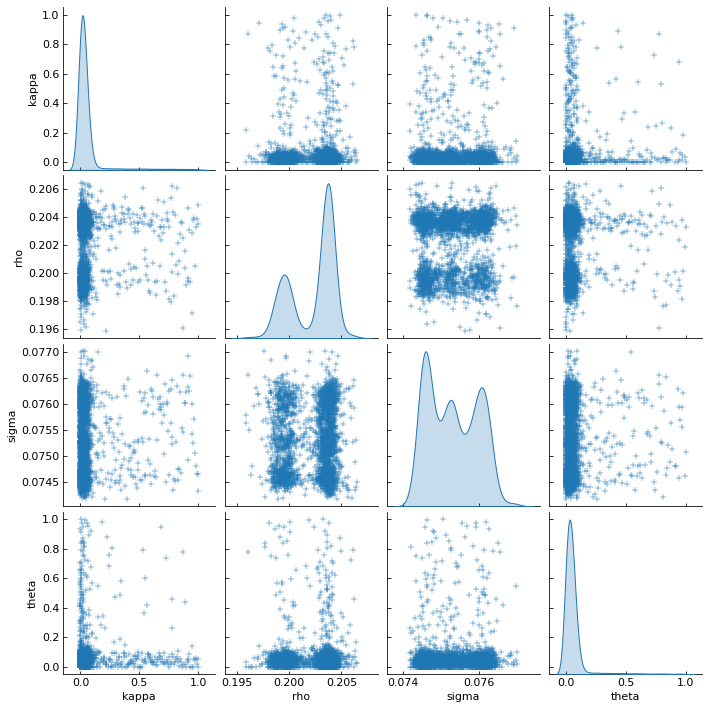

In [22]:
history2 = snl.estimate_history("0th")

In [112]:
# Download and update datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()
# Check records
snl = cs.Scenario(country="Germany", jhu_data=jhu_data, population_data=population_data)

LOCAL LIBRARY


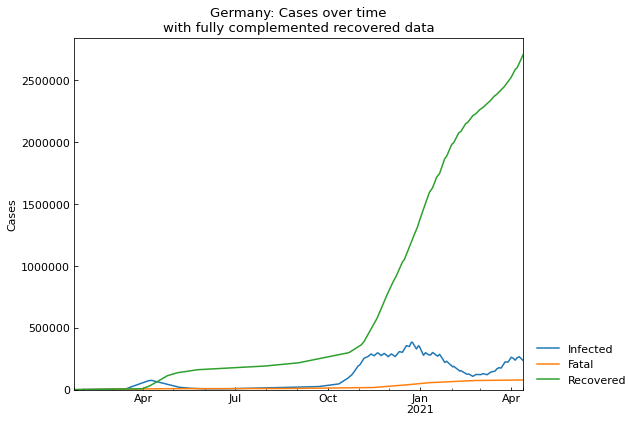

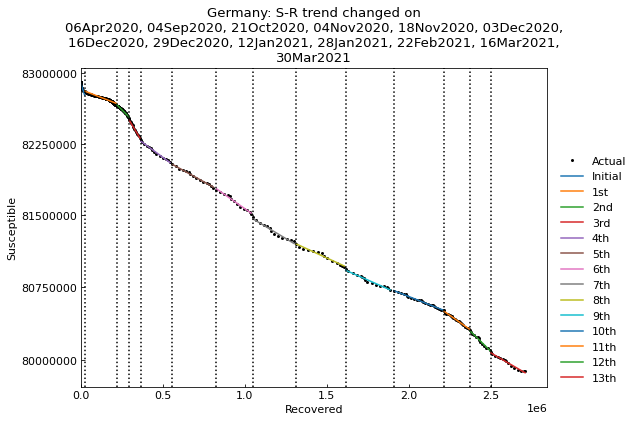


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 8th phase (04Nov2020 - 17Nov2020): finished  708 trials in 0 min 40 sec


PicklingError: Can't pickle <class 'covsirphy.simulation.estimator.Estimator'>: it's not the same object as covsirphy.simulation.estimator.Estimator

In [113]:
snl.records()
# S-R trend analysis
snl.trend().summary()
# Parameter estimation of SIR-F model
snl.estimate(cs.SIRF)
# History of reproduction number
_ = snl.history(target="Rt")
# History of parameters
_ = snl.history_rate()
_ = snl.history(target="rho")
# # Simulation for 30 days
# snl.add(days=30)
# _ = snl.simulate()